# fully functioning MLP classifier for label classification on MNIST dataset

In [3]:
# importing libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from keras.optimizers import SGD

In [4]:
# load the dataset and split it in train and test data in 70:30 ratio
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
num_labels = len(np.unique(y_train))
print("total labels {}".format(num_labels))
print("labels:{0}".format(np.unique(y_train)))

total labels 10
labels:[0 1 2 3 4 5 6 7 8 9]


In [6]:
# one hot encodeing
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

img_size = x_train.shape[1]
input_size = img_size*img_size

x_train = np.reshape(x_train,[-1,input_size])
x_test = np.reshape(x_test,[-1,input_size])

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [7]:
# training accuracy vs epochs plot
def accuracy_plot(History, epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, History.history["accuracy"], label="accuracy")
  plt.plot(N, History.history["val_accuracy"], label="val_accuraccy")
  plt.title("Accuracy vs epochs")
  plt.xlabel("Epoch #")
  plt.ylabel("accuracy")
  plt.legend(loc="upper right")
  plt.savefig("plot")

In [8]:
# training loss vs epochs plot
def loss_plot(History, epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, History.history["loss"], label="train_loss")
  plt.plot(N, History.history["val_loss"], label="val_loss")
  plt.title("Training Loss vs epochs")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")
  plt.savefig("plot")

In [9]:
# MLP function returning model object
batch_Size = 128
def MLP(kinit='glorot_normal'):
  
  hidden_units = 256
  dropout = 0.45
  model = Sequential()

  model.add(Dense(hidden_units,input_dim = input_size, kernel_initializer=kinit))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(hidden_units,kernel_initializer=kinit))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))

  model.add(Dense(num_labels))
  model.add(Activation('softmax'))

  return model

  # model.summary()

# part 1

## 1. Experiment with different optimizers

### 1.(a) `adam` optimizer

In [10]:
model1 = MLP()
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,epochs = 5, batch_size = batch_Size, validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.7350 - accuracy: 0.7668 - val_loss: 0.1474 - val_accuracy: 0.9558
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2072 - accuracy: 0.9384 - val_loss: 0.1024 - val_accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1556 - accuracy: 0.9533 - val_loss: 0.0919 - val_accuracy: 0.9713
Epoch 4/5
469/469 [==============================] - 4s 7ms/step - loss: 0.1302 - accuracy: 0.9614 - val_loss: 0.0791 - val_accuracy: 0.9764
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1133 - accuracy: 0.9655 - val_loss: 0.0752 - val_accuracy: 0.9769


In [11]:
# Evaluate the model on the test data using `evaluate`
_, acc1 = model1.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy for adam optimizer: ",acc1*100)

Test accuracy for adam optimizer:  97.68999814987183


In [48]:
# accuracy_plot(history1,5),loss_plot(history1,5)

###  1.(b)`RMSprop` optimiser

In [13]:
model2 = MLP()
model2.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])
history2 = model2.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.6464 - accuracy: 0.7985 - val_loss: 0.1530 - val_accuracy: 0.9530
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2066 - accuracy: 0.9393 - val_loss: 0.1116 - val_accuracy: 0.9660
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1551 - accuracy: 0.9556 - val_loss: 0.1014 - val_accuracy: 0.9721
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1345 - accuracy: 0.9603 - val_loss: 0.0945 - val_accuracy: 0.9744
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1232 - accuracy: 0.9651 - val_loss: 0.0887 - val_accuracy: 0.9778


In [14]:
_, acc2 = model2.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy for RMSprop optimizer: ",acc2*100)

Test accuracy for RMSprop optimizer:  97.78000116348267


In [47]:
# accuracy_plot(history2,5),loss_plot(history2,5)

### 1.(c) `SGD with momentum`

In [16]:
model3 = MLP()
model3.compile(loss='categorical_crossentropy', optimizer=SGD( momentum = 0.7 ),metrics=['accuracy'])
history3 = model3.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.4706 - accuracy: 0.5118 - val_loss: 0.3713 - val_accuracy: 0.8973
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5100 - accuracy: 0.8482 - val_loss: 0.2774 - val_accuracy: 0.9200
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4018 - accuracy: 0.8808 - val_loss: 0.2364 - val_accuracy: 0.9323
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3415 - accuracy: 0.8984 - val_loss: 0.2061 - val_accuracy: 0.9397
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2995 - accuracy: 0.9122 - val_loss: 0.1848 - val_accuracy: 0.9457


In [17]:
_, acc3 = model3.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy for SGD with momentum optimizer: ",acc3*100)

Test accuracy for SGD with momentum optimizer:  94.56999897956848


In [46]:
# accuracy_plot(history3,5)
# loss_plot(history3,5)

### 1.(d) `SGD without momentum`

In [19]:
model4 = MLP()
model4.compile(loss='categorical_crossentropy', optimizer=SGD(momentum = 0.0), metrics=['accuracy'])
history4 = model4.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.9685 - accuracy: 0.3297 - val_loss: 0.7471 - val_accuracy: 0.8334
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9165 - accuracy: 0.7154 - val_loss: 0.4645 - val_accuracy: 0.8819
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6630 - accuracy: 0.7973 - val_loss: 0.3796 - val_accuracy: 0.8975
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5662 - accuracy: 0.8277 - val_loss: 0.3357 - val_accuracy: 0.9041
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4988 - accuracy: 0.8504 - val_loss: 0.3076 - val_accuracy: 0.9113


In [20]:
_, acc4 = model4.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy for SGD without momentum optimizer: ",acc4*100)

Test accuracy for SGD without momentum optimizer:  91.1300003528595


In [45]:
# accuracy_plot(history4,5)
# loss_plot(history4,5)

### comparison plot

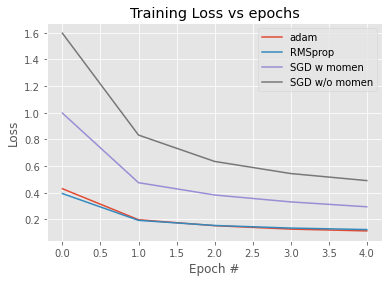

In [23]:
# training loss vs epochs plot
epochs = 5
hist = [[history1,"adam"],[history2,"RMSprop"],[history3,"SGD w momen"],[history4,"SGD w/o momen"]]
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
for h in hist:
  plt.plot(N, h[0].history["loss"], label=h[1])
# plt.plot(N, History.history["val_loss"], label="val_loss")
plt.title("Training Loss vs epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.savefig("plot")

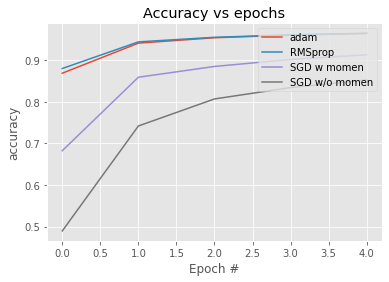

In [24]:
# training accuracy vs epochs plot
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
for h in hist:
  plt.plot(N, h[0].history["accuracy"], label=h[1])
# plt.plot(N, History.history["val_accuracy"], label="val_accuraccy")
plt.title("Accuracy vs epochs")
plt.xlabel("Epoch #")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.savefig("plot")

## 2. Experiment with different weight initialisation 

### 2.(a) Xavier weight initialization

In [25]:
model5 = MLP('glorot_normal')
model5.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
history5 = model5.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 1.9519 - accuracy: 0.3256 - val_loss: 0.7217 - val_accuracy: 0.8356
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.8959 - accuracy: 0.7167 - val_loss: 0.4689 - val_accuracy: 0.8790
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6656 - accuracy: 0.7945 - val_loss: 0.3841 - val_accuracy: 0.8968
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5620 - accuracy: 0.8281 - val_loss: 0.3389 - val_accuracy: 0.9062
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5011 - accuracy: 0.8477 - val_loss: 0.3088 - val_accuracy: 0.9121


In [26]:
_, acc5 = model5.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("test accuracy for Xaviers initialisation",acc5*100)

test accuracy for Xaviers initialisation 91.21000170707703


In [49]:
# accuracy_plot(history5,5)
# loss_plot(history5,5)

### 2.(b) uiform weight initialization

In [28]:
model6 = MLP('uniform')
model6.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
history6 = model6.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 2.1264 - accuracy: 0.2947 - val_loss: 1.0310 - val_accuracy: 0.7960
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 1.0426 - accuracy: 0.6944 - val_loss: 0.5410 - val_accuracy: 0.8678
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6857 - accuracy: 0.7954 - val_loss: 0.4201 - val_accuracy: 0.8900
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5641 - accuracy: 0.8299 - val_loss: 0.3661 - val_accuracy: 0.9013
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.4949 - accuracy: 0.8525 - val_loss: 0.3320 - val_accuracy: 0.9082


In [ ]:
_, acc6 = model6.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("test accuracy for uniform initialisation",acc6*100)
# accuracy_plot(history6,5)
# loss_plot(history6,5)

### 2.(c) normal weight initialization

In [30]:
model7 = MLP('normal')
model7.compile(loss='categorical_crossentropy', optimizer=SGD(),metrics=['accuracy'])
history7 = model7.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.9695 - accuracy: 0.3247 - val_loss: 0.7486 - val_accuracy: 0.8307
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.9166 - accuracy: 0.7110 - val_loss: 0.4751 - val_accuracy: 0.8761
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6850 - accuracy: 0.7856 - val_loss: 0.3862 - val_accuracy: 0.8960
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5693 - accuracy: 0.8280 - val_loss: 0.3416 - val_accuracy: 0.9057
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.5053 - accuracy: 0.8468 - val_loss: 0.3117 - val_accuracy: 0.9121


In [ ]:
_, acc7 = model7.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("test accuracy for normal initialisation",acc7*100)
# accuracy_plot(history7,5)
# loss_plot(history7,5)

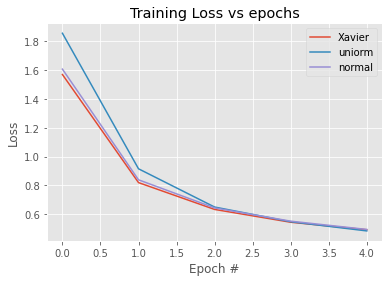

In [32]:
# training loss vs epochs plot
epochs = 5
hist2 = [[history5,"Xavier"],[history6,"uniorm"],[history7,"normal"]]
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
for h in hist2:
  plt.plot(N, h[0].history["loss"], label=h[1])
# plt.plot(N, History.history["val_loss"], label="val_loss")
plt.title("Training Loss vs epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
# plt.savefig("plot")


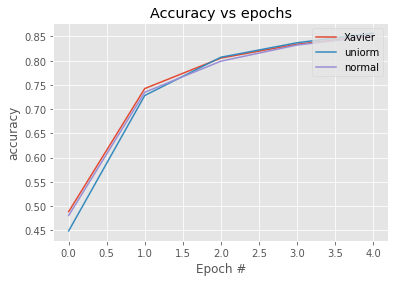

In [34]:
# training accuracy vs epochs plot
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
for h in hist2:
  plt.plot(N, h[0].history["accuracy"], label=h[1])
# plt.plot(N, History.history["val_accuracy"], label="val_accuraccy")
plt.title("Accuracy vs epochs")
plt.xlabel("Epoch #")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
# plt.savefig("plot")

## 3. different learning rates and performing exponential annealing on the learning rate.

### 3.(a) learning rates and exponential annealing

In [35]:
from tensorflow import keras
from keras.optimizers.schedules import ExponentialDecay
learning_rates =  [ 0.1, 0.01, 0.001]
exponential_loss = []
history_3a = []
models_3a = []
for lr in learning_rates:
  lr_schedule = ExponentialDecay(lr, decay_steps=100000, decay_rate=0.96, staircase=True)
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)
  model = MLP()
  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
  history = model.fit(x_train,y_train,epochs = 5, batch_size = batch_Size,validation_data = (x_test, y_test))
  models_3a.append(model)
  history_3a.append(history)
  exponential_loss.append(model.history.history['loss'])

469/469 [==============================] - 4s 8ms/step - loss: 5.3811 - accuracy: 0.1501 - val_loss: 2.1916 - val_accuracy: 0.1473
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 2.2462 - accuracy: 0.1288 - val_loss: 2.1287 - val_accuracy: 0.1708
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 2.2246 - accuracy: 0.1380 - val_loss: 2.0763 - val_accuracy: 0.1887
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 2.2313 - accuracy: 0.1364 - val_loss: 2.1174 - val_accuracy: 0.2033
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 2.2403 - accuracy: 0.1328 - val_loss: 2.0579 - val_accuracy: 0.2062
Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6113 - accuracy: 0.8114 - val_loss: 0.1902 - val_accuracy: 0.9478
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3705 - accuracy: 0.8993 - val_loss: 0.1853 - val_accuracy: 0.9509
Epoch 3/5
469/469 [====

In [40]:
# for learning rate 0.1
_, accr1 = models_3a[0].evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy when encoded data is used as input: ",accr1*100)

Test accuracy when encoded data is used as input:  94.62000036239624


In [38]:
# for learning rate 0.01
_, accr2 = models_3a[1].evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy when encoded data is used as input: ",accr2*100)

Test accuracy when encoded data is used as input:  95.4800009727478


In [39]:
# for learning rate 0.001
_, accr3 = models_3a[2].evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy when encoded data is used as input: ",accr3*100)

Test accuracy when encoded data is used as input:  97.39999771118164


In [41]:
table = [['Learning rate', 'ACCURACY'],
         ['0.1',str(accr1*100)],
         ['0.01',str(accr2*100)],
         ['0.001',str(accr3*100)]]

print()
print()
from tabulate import tabulate
print(tabulate(table, headers='firstrow'))



  Learning rate    ACCURACY
---------------  ----------
          0.1         94.62
          0.01        95.48
          0.001       97.4


# part 2

## MLP and autoencoder

In [ ]:
# autoencoder class
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim  

    self.encoder = tf.keras.Sequential([
                                        layers.Flatten(),
                                        layers.Dense(latent_dim, activation='relu'),
                                      ])

    self.decoder = tf.keras.Sequential([
                                        layers.Dense(784, activation='sigmoid'),
                                        layers.Reshape((28, 28))
                                      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# compile and fit the model
latent_dim = 784
epochs = 10
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='RMSprop', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, epochs = epochs, shuffle=True, validation_data=(x_test, x_test))
encoded_data_train = autoencoder.encoder(x_train).numpy()
encoded_data_test = autoencoder.encoder(x_test).numpy()

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0166 - val_loss: 0.0025
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/10
1875/1875 [==============================] - 31s 16m

In [ ]:
encoded_data_train.shape,encoded_data_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
modelp2 = MLP()
modelp2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
historyp2 = modelp2.fit(encoded_data_train,y_train,epochs = 5, batch_size = batch_Size, validation_data = (encoded_data_test, y_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.8033 - accuracy: 0.7368 - val_loss: 0.1543 - val_accuracy: 0.9517
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2392 - accuracy: 0.9264 - val_loss: 0.1253 - val_accuracy: 0.9607
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1833 - accuracy: 0.9439 - val_loss: 0.1070 - val_accuracy: 0.9665
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1500 - accuracy: 0.9541 - val_loss: 0.1060 - val_accuracy: 0.9651
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1311 - accuracy: 0.9593 - val_loss: 0.0957 - val_accuracy: 0.9710


In [ ]:
_, accp2 = modelp2.evaluate(encoded_data_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy when encoded data is used as input: ",accp2*100)

Test accuracy:  97.10000157356262


In [42]:
_, accp_raw = model_raw.evaluate(x_test,y_test,batch_size = batch_Size, verbose=0)
print("Test accuracy when raw data is used as input: ",accp_raw*100)

Test accuracy when raw data is used as input:  93.450024745275


In [44]:
table = [['Model', 'ACCURACY'],
         ['MLP',accp2],
         ['Autoencoder',accp2_raw],
         ]

print()
print()
# from tabulate import tabulate
print(tabulate(table, headers='firstrow'))



Model          ACCURACY
-----------  ----------
MLP               97.1
Autoencoder       93.45


* accuracy comparison shows that MLP with input as encoded data has performed better in this experiment. As feeding the netwrok with encoded data takesmuch less space hence it is more powerful and produces better results.